Создание веб сервера с нейросетью с помощью FastAPI, на сервере Heroku

 Создайте веб-сервис с помощью FastAPI, загрузите на него обученную модель Fashion MNIST и протестируйте ее.




In [ ]:
# загрузка всего датасет MNIST

from tensorflow.keras.datasets import fashion_mnist      
(x_train_org, y_train_org), (x_test_org, y_test_org) = fashion_mnist.load_data()               

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# подготовка набора экземпляров класса

x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   

x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

In [ ]:
# подготовка набора меток класса

from tensorflow.keras import utils              
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
# проверка размерностей

print(x_train.shape)
print(y_train.shape)  

(60000, 784)
(60000, 10)


In [ ]:
# Ваше решение

In [ ]:
# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем для to_categorical
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
#from google.colab import drive

%matplotlib inline

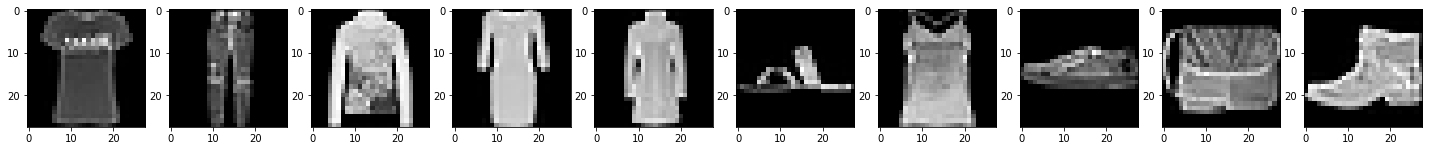

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_org==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train_org[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [ ]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель

model = Sequential()

#model.add(BatchNormalization(input_shape=x_train.shape[1:])) # Слой пакетной нормализации
model.add(Dense(100, activation='relu',input_shape=x_train.shape[1:])) # Первый сверточный слой
model.add(Dropout(0.5)) # Слой регуляризации Dropout
model.add(Dense(500, activation='relu')) # Второй сверточный слой
model.add(Dropout(0.5)) # Слой регуляризации Dropout
model.add(Dense(100, activation='relu')) # Второй сверточный слой
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/30
469/469 [==============================] - 5s 11ms/step - loss: 0.3684 - accuracy: 0.8665 - val_loss: 0.3670 - val_accuracy: 0.8735
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3677 - accuracy: 0.8661 - val_loss: 0.3561 - val_accuracy: 0.8726
Epoch 3/30
469/469 [==============================] - 5s 10ms/step - loss: 0.3657 - accuracy: 0.8666 - val_loss: 0.3593 - val_accuracy: 0.8720
Epoch 4/30
469/469 [==============================] - 5s 12ms/step - loss: 0.3648 - accuracy: 0.8677 - val_loss: 0.3620 - val_accuracy: 0.8722
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3614 - accuracy: 0.8691 - val_loss: 0.3606 - val_accuracy: 0.8759
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3581 - accuracy: 0.8686 - val_loss: 0.3601 - val_accuracy: 0.8731
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3589 - accuracy: 0.8698 - val_loss: 0.3563 - val_accuracy: 0.8762
Epo

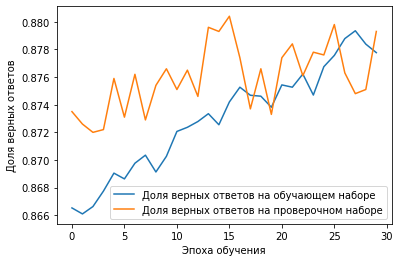

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=30,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.save('model_minst_f.h5')

In [ ]:
def process(image_file):
    #image = Image.open(image_file)  # Открытие обрабатываемого файла
    resized_image = image_file#image.resize((28, 28))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image)#[..., 0][np.newaxis, ...]   # Регулировка формы тензора для подачи в сеть
    prediction = np.argmax(model.predict(array.reshape(1,28*28)))             # Запуск предсказания сети
    return prediction

In [ ]:
text_labels=['T-Shirt','shorts','sweater','dress','raincoat','sandals','shirt','sneakers','bag','boots']

In [ ]:
print(text_labels[process(x_train_org[0])])

boots


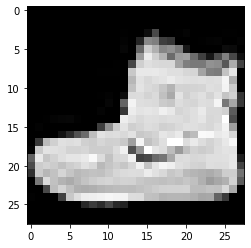

In [ ]:
plt.imshow(x_train_org[0],cmap='gray')
plt.show()

In [ ]:
predict_file = '''

from tensorflow.keras.models import load_model
import numpy as np
from io import BytesIO
from PIL import Image 

INPUT_SHAPE = (28, 28, 1)

model = load_model('model_minst_f.h5')  # Инициализация модели
text_labels=['T-Shirt','shorts','sweater','dress','raincoat','sandals','shirt','sneakers','bag','boots']

def process(image_file):
    
    image = Image.open(BytesIO(image_file))  # Открытие обрабатываемого файла
    resized_image = image.resize((28, 28))          # Изменение размера изображения в соответствии со входом сети
    array = np.array(resized_image)
    print(array.shape)
    prediction = np.argmax(model.predict(array.reshape(1,28*28)))             # Запуск предсказания сети
    return text_labels[prediction]

'''

# Сохранение кода в файл
with open('predict.py', 'w') as file:
    file.write(predict_file)

In [ ]:
main_file = '''from fastapi import FastAPI, File
from predict import process

app = FastAPI()


@app.post("/predict")
async def create_file(file: bytes = File(...)):
    return {"result": process(file)}
'''

with open('main.py', 'w') as file:
    file.write(main_file)

In [ ]:
proc_file = 'web: uvicorn main:app --host=0.0.0.0 --port=${PORT:-5000}'

with open('Procfile', 'w') as file:
    file.write(proc_file)

In [ ]:
requirements_file = '''

fastapi==0.68.1
tensorflow-cpu==2.5.0
uvicorn==0.15.0
Pillow==7.1.2
python-multipart==0.0.5

'''

with open('requirements.txt', 'w') as file:
    file.write(requirements_file)

In [ ]:
!git --version

git version 2.17.1


In [ ]:
!git config --global user.email "zadrutskiy@yandex.ru"
!git config --global user.name "A1171"

In [ ]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0  11846      0 --:--:-- --:--:-- --:--:-- 11961
+ dpkg -s apt-transport-https
+ echo 
+ apt-get update
+ apt-get install -y apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ apt-key add -
+ curl https://cli-assets.heroku.com/apt/release.key
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5393  100  5393    0     0  53396      0 --:--:-- --:--:-- --:--:-- 52872
+ apt-get update
+ apt-get install -y heroku
 ›   Warning: Our terms of service have changed: 
 ›   https://dashboard.heroku.com/terms-of-service


In [ ]:
!heroku --version

heroku/7.59.2 linux-x64 node-v12.21.0


In [ ]:
LOGIN = 'zadrutskiy@zandex.ru'  # Укажите свой логин
API_KEY = '9c6fcbfb-acb2-46c6-924c-7d5079f78732'  # Укажите свой API-key
           

auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
    file.write(auth_file)

In [ ]:
!ls /root/

In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	__pycache__/
	nohup.out
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git add model_minst_f.h5
!git add predict.py
!git add main.py
!git add Procfile
!git add requirements.txt
!git add .config/

In [ ]:
!git commit -m "My first commit1"

[master 20ed862] My first commit1
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!git log

commit f88de36ed919b1dafbd00c609761966dae7af00f (HEAD -> master)
Author: A1171 <zadrutskiy@yandex.ru>
Date:   Thu Dec 16 17:07:16 2021 +0000

    My first commit1


In [ ]:
!heroku create minst-api-457356

Creating ⬢ minst-api-457356... ⣾ 
⣽⣻⢿⡿⣟⣯⣷⣾⣽Creating ⬢ minst-api-457356... done
https://minst-api-457356.herokuapp.com/ | https://git.heroku.com/minst-api-457356.git


In [ ]:
!git remote -v

heroku	https://git.heroku.com/minst-api-457356.git (fetch)
heroku	https://git.heroku.com/minst-api-457356.git (push)


In [ ]:
!git push heroku master

Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 544 bytes | 544.00 KiB/s, done.
Total 6 (delta 4), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Using buildpack: heroku/python
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the same version as the last build: python-3.9.9
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> No change in requirements detected, installing from cache
remote: -----> Using cached install of python-3.9.9
remote: -----> Installing pip 21.3.1, setuptools 57.5.0 and wheel 0.37.0
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote: -----> Discovering process types
remote:        Procfile declares types -> web
remote: 
remote: -

In [ ]:
from PIL import Image
im = Image.fromarray(x_test_org[0])
im.save("x_test_org_0.jpeg")
files = {'file': open('x_test_org_0.jpeg','rb')}
r = requests.post('https://minst-api-457356.herokuapp.com/predict', files=files)
print(r.status_code)

200


In [ ]:
print(r.json())

{'result': 'boots'}


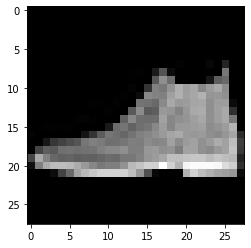

In [ ]:
plt.imshow(x_test_org[0],cmap='gray')
plt.show()

In [ ]:
!heroku logs

2021-12-16T17:11:37.746810+00:00 app[api]: Release v1 created by user zadrutskiy@yandex.ru
2021-12-16T17:11:37.746810+00:00 app[api]: Initial release by user zadrutskiy@yandex.ru
2021-12-16T17:11:37.921554+00:00 app[api]: Enable Logplex by user zadrutskiy@yandex.ru
2021-12-16T17:11:37.921554+00:00 app[api]: Release v2 created by user zadrutskiy@yandex.ru
2021-12-16T17:16:51.000000+00:00 app[api]: Build started by user zadrutskiy@yandex.ru
2021-12-16T17:18:26.568979+00:00 app[api]: Release v3 created by user zadrutskiy@yandex.ru
2021-12-16T17:18:26.568979+00:00 app[api]: Deploy 51fc1b53 by user zadrutskiy@yandex.ru
2021-12-16T17:18:26.587999+00:00 app[api]: Scaled to web@1:Free by user zadrutskiy@yandex.ru
2021-12-16T17:18:41.122584+00:00 heroku[web.1]: Starting process with command `uvicorn main:app --host=0.0.0.0 --port=${PORT:-5000}`
2021-12-16T17:18:42.271674+00:00 app[web.1]: INFO:     Uvicorn running on http://0.0.0.0:6405 (Press CTRL+C to quit)
2021-12-16T17:18:42.271766+00:00 ap

In [ ]:
#Дальше тест, можно не смотреть

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install python-multipart

     |████████████████████████████████| 51 kB 549 kB/s 
     |████████████████████████████████| 10.1 MB 27.5 MB/s 
     |████████████████████████████████| 61 kB 207 kB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=9151613592b9719012e95a2bf98adaf80fed528744b726bf26b8da7ab6af7262
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built python-multipart


In [ ]:
files = {'file': open('auto.jpg','rb')}
r = requests.post('https://testing-restapi.herokuapp.com/predict', files=files)
print(r.status_code)

In [ ]:
main_file = '''
from fastapi import FastAPI

app = FastAPI()

@app.get("/test")
def read_root():
    return {"Hello": "World1"}
'''

with open('main.py', 'w') as file:
    file.write(main_file)

In [ ]:
!nohup uvicorn main:app --reload &
# nohup и & - прописываются для запуска процесса в фоне (чтобы не блокировать Colab)
# параметр --reload позволяет автоматически перезапускать uvicorn при изменениях в файле main.py

nohup: appending output to 'nohup.out'


In [ ]:
!cat nohup.out

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [186] using statreload
INFO:     Started server process [188]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     127.0.0.1:39172 - "GET /test HTTP/1.1" 200 OK


In [ ]:
import requests

In [ ]:
r = requests.get('http://127.0.0.1:8000/test')
print(r.status_code)
print(r.text)

200
{"Hello":"World1"}
